In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

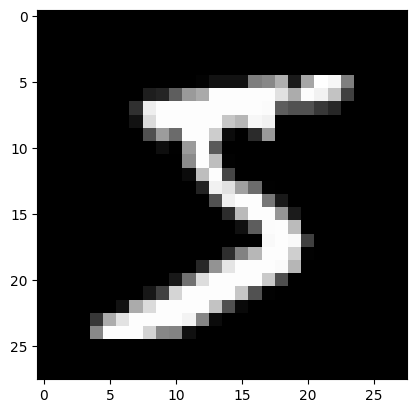

In [7]:
plt.imshow(single_image,cmap='gray')


In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

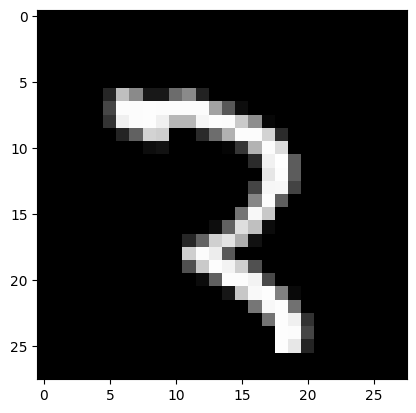

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [26]:
model = keras.Sequential()
model.add (layers. Input (shape=(28,28,1)))
model.add (layers. Conv2D (filters=32, kernel_size=(7,7), activation='relu'))
model.add (layers. MaxPool2D (pool_size=(3,3)))
model.add (layers. Flatten())
model.add (layers. Dense (32, activation='relu'))
model.add (layers. Dense (16, activation='relu'))
model.add (layers. Dense (8, activation='relu'))
model.add (layers. Dense (10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        1600      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 32)                50208     
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                      

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train_scaled,y_train_onehot,epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled, y_test_onehot))

Epoch 1/5
938/938 [==============================] - 30s 30ms/step - loss: 0.5156 - accuracy: 0.8356 - val_loss: 0.1671 - val_accuracy: 0.9529
Epoch 2/5
938/938 [==============================] - 26s 28ms/step - loss: 0.1463 - accuracy: 0.9580 - val_loss: 0.1061 - val_accuracy: 0.9684
Epoch 3/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0966 - accuracy: 0.9719 - val_loss: 0.0753 - val_accuracy: 0.9777
Epoch 4/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0726 - accuracy: 0.9787 - val_loss: 0.0667 - val_accuracy: 0.9808
Epoch 5/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0602 - accuracy: 0.9829 - val_loss: 0.0665 - val_accuracy: 0.9791


In [29]:
metrics = pd.DataFrame(model.history.history)

In [30]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.515595,0.835633,0.167067,0.9529
1,0.146304,0.957983,0.106087,0.9684
2,0.096626,0.971950,0.075280,0.9777
3,0.072582,0.978750,0.066713,0.9808
4,0.060169,0.982933,0.066481,0.9791


NAME : MOHAMED ROSHAN S
REGISTER NUMBER : 212222040101


<Axes: >

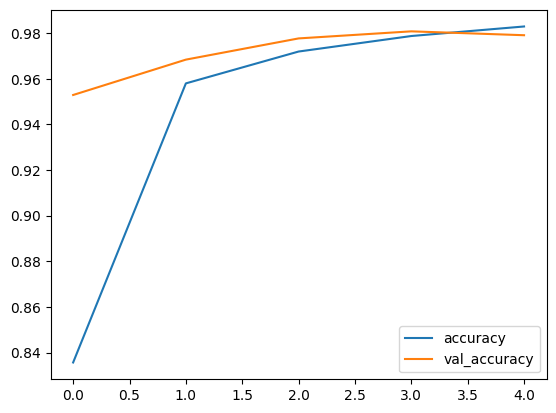

In [31]:
print('''NAME : MOHAMED ROSHAN S
REGISTER NUMBER : 212222040101''')
metrics[['accuracy','val_accuracy']].plot()

NAME : MOHAMED ROSHAN S
REGISTER NUMBER : 212222040101


<Axes: >

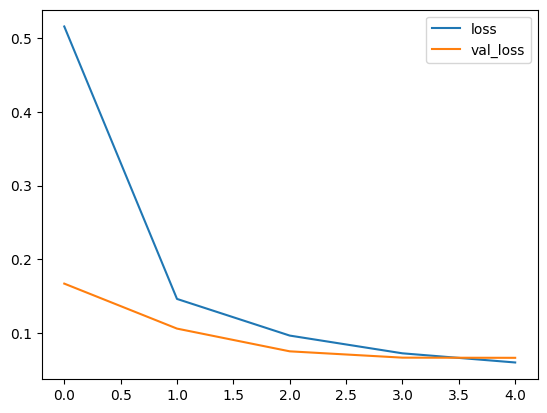

In [32]:
print('''NAME : MOHAMED ROSHAN S
REGISTER NUMBER : 212222040101''')
metrics[['loss','val_loss']].plot()

In [33]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 5ms/step


In [34]:
print('''NAME : MOHAMED ROSHAN S
REGISTER NUMBER : 212222040101''')
print(confusion_matrix(y_test,x_test_predictions))

NAME : MOHAMED ROSHAN S
REGISTER NUMBER : 212222040101
[[ 965    0    0    0    0    1    5    0    8    1]
 [   0 1130    2    1    0    0    0    0    2    0]
 [   0    0  995    2    1    0    1    2   31    0]
 [   0    0    4  983    0   13    0    1    8    1]
 [   0    0    2    0  967    0    6    0    1    6]
 [   1    0    0    3    0  877    3    2    6    0]
 [   2    3    1    0    1    1  943    0    7    0]
 [   0    2   15    2    1    0    0  997    8    3]
 [   0    0    1    0    0    0    3    3  966    1]
 [   6    1    3    3    5    3    0   12    8  968]]


In [35]:
print('''NAME : MOHAMED ROSHAN S
REGISTER NUMBER : 212222040101''')
print(classification_report(y_test,x_test_predictions))

NAME : MOHAMED ROSHAN S
REGISTER NUMBER : 212222040101
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.97      0.96      0.97      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.92      0.99      0.96       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Prediction for a single input

In [37]:

img = image.load_img('8.jpg')

In [38]:
type(img)

PIL.Image.Image

In [39]:
img = image.load_img('8.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [40]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 27ms/step


In [41]:
print(x_single_prediction)

[8]


NAME : MOHAMED ROSHAN S
REGISTER NUMBER : 212222040101


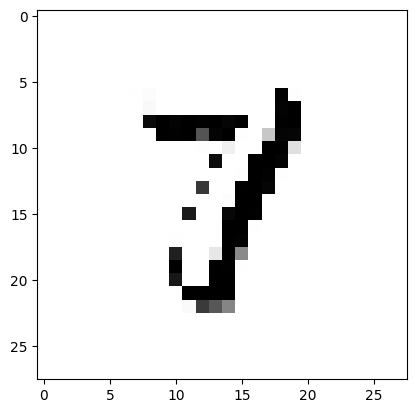

In [42]:
print('''NAME : MOHAMED ROSHAN S
REGISTER NUMBER : 212222040101''')
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')